In [2]:
from qiskit import QuantumCircuit

In [3]:
from qiskit_ibm_runtime import (
    QiskitRuntimeService, 
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

In [6]:
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

In [2]:
n = 8  # Number of qubits

qc = QuantumCircuit(n)

# Create a bell pair
qc.h(0)
qc.cx(0, 1)

index = 2  # Index of a target qubit
qubits = [0, 1]  # Qubits which are already entangled

while len(qubits) < n:
    temp_qubits = []

    # Entangle the remaining qubits with already entangled qubits
    for qubit in qubits:
        qc.cx(qubit, index)
        temp_qubits.append(index)
        index += 1
        if index >= n:
            break

    qubits += temp_qubits  # Update the entangled qubits list

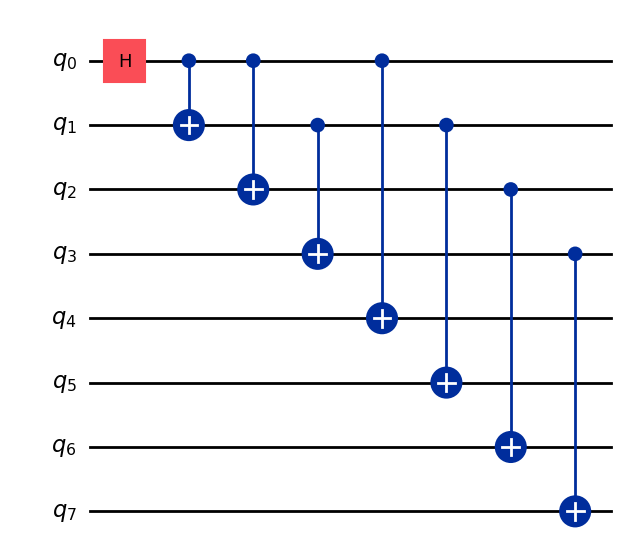

In [3]:
qc.draw('mpl')

In [7]:
import rustworkx as rx
from rustworkx.visit import BFSVisitor
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

class TreeEdgesRecorder(BFSVisitor):
    def __init__(self):
        self.edges = []

    def tree_edge(self, edge):
        self.edges.append(edge)


# Coupling map of the backend
coupling_map = backend.coupling_map
edges = list(coupling_map.get_edges())

# Create a graph from the layout
G = rx.PyGraph()
indices = G.add_nodes_from(range(127))
for edge in edges:
    G.add_edge(edge[0], edge[1], None)

# Preparing registers and Quantum Circuit
qr = QuantumRegister(127)
cr = ClassicalRegister(127)
qc = QuantumCircuit(qr, cr)

source_vertex = 66  # Root node
vis = TreeEdgesRecorder()
rx.bfs_search(G, [source_vertex], vis)  # Run the BFS algorithm

# Create GHZ-State
qc.h(qr[source_vertex])
for edge in vis.edges:
    u, v, _ = edge
    qc.cx(qr[u], qr[v])

In [10]:
reduced_state = 54
quantum_register = reduced_state
classical_register = reduced_state
def deentangle_qubits(edges):
    qc = QuantumCircuit(quantum_register , classical_register )

    target_qubits = [i[1] for i in edges]

    # Qubits 13 and 113 are not used in the GHZ state
    qubits = stabilizer_qubits + [13, 113]
    for qubit in qubits:
        index = target_qubits.index(qubit)
        u, v, _ = edges[index]
        qc.cx(quantum_register[u], quantum_register[v])

    return qc


unentangle_circuit = deentangle_qubits(edges) # edges: BFS tree edges

NameError: name 'stabilizer_qubits' is not defined

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.converters import circuit_to_instruction
 
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1]).c_if(c, 2)
circuit_to_instruction(circ)

Instruction(name='circuit-158', num_qubits=3, num_clbits=3, params=[])

In [4]:
from qiskit import QuantumRegister, QuantumCircuit

# Create a quantum register with 127 qubits
qr = QuantumRegister(127, 'q')

# Get a qubit from the register at index 34
qubit = qr[34]

# Extract the index of the qubit
qubit_index = next(index for index, q in enumerate(qr) if q == qubit)

print(f"Qubit index: {qubit_index}")
print(qubit)

Qubit index: 34
Qubit(QuantumRegister(127, 'q'), 34)


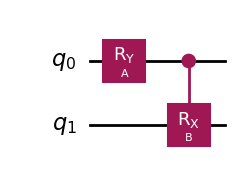

In [17]:
from qiskit.circuit import QuantumCircuit, Parameter
 
circuit = QuantumCircuit(2)
params = [Parameter('A'), Parameter('B'), Parameter('C')]
circuit.ry(params[0], 0)
circuit.crx(params[1], 0, 1)
circuit.draw('mpl')


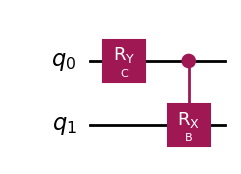

In [18]:
circuit.assign_parameters({params[0]: params[2]}, inplace=True)
circuit.draw('mpl')

In [ ]:
print({params[0]: params[2]})

In [23]:
qc = QuantumCircuit(50)
used_qubits = [ qc.find_bit(qubit).index for qubit in qc.qubits]

In [24]:
print(used_qubits)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [26]:
print(len([2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 58, 59, 60, 61, 62, 63, 64, 65, None]))

51


In [29]:
flips = (6 % 2 == 1)
print(flips)

False


In [30]:
!pip install graphviz

In [35]:
import rustworkx as rx
from rustworkx.visit import BFSVisitor
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [38]:
from qiskit.visualization import plot_gate_map

In [31]:
service = QiskitRuntimeService(channel="ibm_quantum")

# Specify a system to use for transpilation, DO NOT change
backend = service.backend("ibm_kyoto")

In [36]:
coupling_map = backend.coupling_map
edges = list(coupling_map.get_edges())

# Create a graph from the coupling map
G = rx.PyGraph()
indices = G.add_nodes_from(range(127))
for edge in edges:
    G.add_edge(edge[0], edge[1], None)

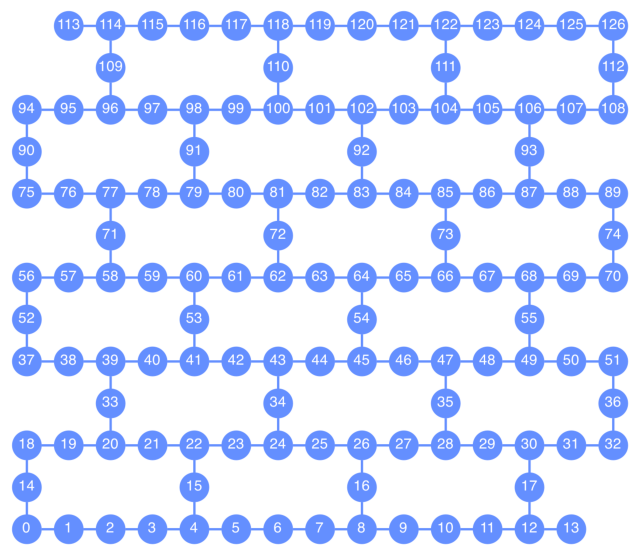

In [39]:
plot_gate_map(backend, qubit_size=60, font_size=25, figsize=(8,8))

In [40]:
# Visualize the graph
rx.draw_circuit_graph(G, edge_layers=True, node_layers=True, figsize=(12, 12))

AttributeError: module 'rustworkx' has no attribute 'draw_circuit_graph'

In [44]:
qubit_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 58, 59, 60, 61, 62, 63, 64, 65]

In [45]:
qr = QuantumRegister(127, 'q')
    # Create a list of qubits from the QuantumRegister using the qubit indices
qubits = [qr[i] for i in qubit_indices]

In [51]:
print(qubits[0])

Qubit(QuantumRegister(127, 'q'), 2)


In [54]:
qc = QuantumCircuit(qubits)

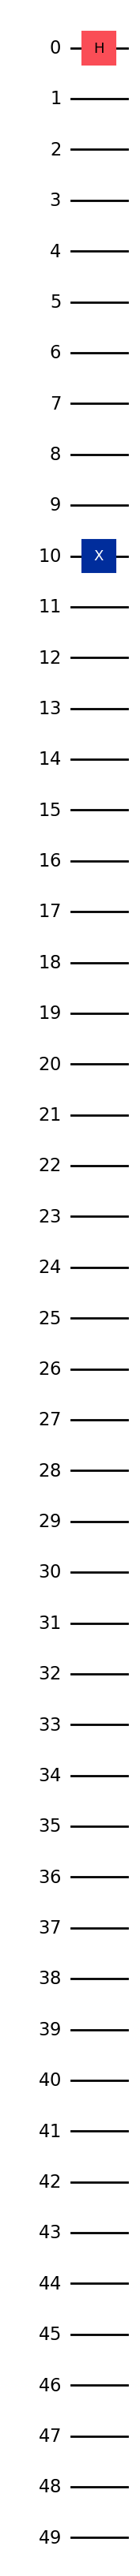

In [55]:
qc.h(qubits[0])
qc.x(qubits[10])

qc.draw('mpl')

In [56]:
import cirq
import numpy as np
selected_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 54, 60, 64]

ModuleNotFoundError: No module named 'cirq'

In [ ]:
qubits = cirq.GridQubit.rect(5, 29)  # 127 qubits
circuit = cirq.Circuit()

In [ ]:
qubits = cirq.GridQubit.rect(5, 29)  # 127 qubits
circuit = cirq.Circuit()

In [ ]:
observable = [cirq.Z(qubits[i]) for i in selected_nodes]

In [ ]:
estimator = cirq.PauliSumEstimator(observable)

In [ ]:
result = estimator.estimator_from_ldm(circuit.to_op(), repetitions=1000)

In [ ]:
print(f'Estimated value of the observable: {result.value}')

In [57]:
from qiskit import QuantumRegister, QuantumCircuit

# Create a Quantum Register with 127 qubits
qr = QuantumRegister(127, 'q')

# Create a Quantum Circuit using the Quantum Register
qc = QuantumCircuit(qr)

# Access the qubit
qubit_0 = qr[0]

# Get the index of the qubit in its Quantum Register
qubit_index = qr.index(qubit_0)

# Output the index
print("Index of the qubit:", qubit_index)

Index of the qubit: 0


In [58]:
print(qr)

QuantumRegister(127, 'q')


In [66]:
print (qc.qubits[0])

Qubit(QuantumRegister(127, 'q'), 0)


In [72]:
print (type(qc.qubits[0]))

<class 'qiskit.circuit.quantumregister.Qubit'>


In [71]:
qubit = qc.qubits[0]
print (qubit[2])

TypeError: 'Qubit' object is not subscriptable

In [83]:
import math
import numpy as np

# Angle in degrees
angle_degrees = 180

# Convert angle to radians
rotation = math.radians(angle_degrees/2)

# Calculate sine of the angle
sin = math.sin(rotation)

# Calculate cosine of the angle
cos = math.cos(rotation)

print(f"Sine of {angle_degrees} degrees: {sin}")
print(f"Cosine of {angle_degrees} degrees: {cos}")


Ry = np.array([[cos, -sin],
              [sin , cos]])


print("Ry:")
print(Ry)

Sine of 180 degrees: 1.0
Cosine of 180 degrees: 6.123233995736766e-17
Ry:
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
